# 1. Image Outline 잡기

**Tesseract 설치**

In [1]:
pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 4.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


**Import Packages**

In [2]:
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np

**Colab에서 Original image를 확인하기 위한 함수 선언**

In [3]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

**외부 URL의 Image 출력**

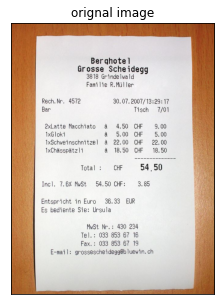

In [4]:
url = 'https://lh3.googleusercontent.com/fife/AAbDypAtemPRDUJv-4Ya-qXAapqM_7oDxCMt-sg0sl9weRSUnHTe9KmQfTBx1GyjaYihUzOezFzXIVa7oqS8QPadPV720BRfGfolwLpYqqVshMLpbQf64yH-rYPnYmhxBd7VURKpnE48P9A9uEgcWP59jPCZ8xzWNUqlrsO50YISSeFi1_IaQ273FvmF-475OZIvyOD42J6FAamjIj-Y9xzcKsucZvmKT8qdaF8dSDlJs_ib2t0UBw5-F9RfF828foFnwpyda9841jL3YBH7iShZkDsWQ9VAf-IRrT5nJAYsG8gjYV6h23O7zZZYnqZJMyp3JOdHd3RmF_CoM1NkmNxxDMRNe2-oOdZSMq8BNbdwWxLnJ3vMcN2m_rdoJKaeiMn3fWQ-nvISSF7HEwJgXMPPZpxOGpsla3VKSiChNevhcQjIKF8mGvNI94bQT96fL1dIrh4Ldwg2A69CCOyQJ8dhSWB6HwEK3WPxlU38YAOAJxPiNeoq3tKjuzohC7Ujk2BIWDGnnqRc1v2rwDHBlyhTPWbFGwAdJCY7mqvWvojX_HB_4fW5lI9Kim17UDR81eQJoObmDia9_7WYaBkwDbHO3AxWJ_F3-NJ2HvojOVlzh2a60bDekJc-dP4aMTd9Z2sp5p-z03uzB9WHW_1bjITNpgrDFEpEfn4NFq7F-pxjbiFufn3JS8DpOfzcwuN5hGbIf3_1l_KC320IIxFg_1QnbsNa_umIX66KQIeiNUaHJ2p89Gf_IIwggJXGc-AUFkwd64ZcTh8xeJ3Ptc1uS2T6TjpK3AcgtATq-UlZSDLd1ZeNqUZ_vAlR2yzzNMHZZe_vuz3DW4m2Q6dX0M8niuv3nM1R5a16BzpwNgIuv34fFYA60OIxJAoWSTcnkVacEiI_vsL8xnjH9BogvJmUqyGukThnYOMc2GAGlDeCYbyoadHARbSP4PNsv4daVlolB7sgE7UKNfhoVX6aUul0OL9oPSavqy9a5m9npnwMftTFz-lqBoxxe8-p2qnyNaPF2YDmKY0sl5OxhseNOdgYQfXPJEcXyTviHfo-CB-i_FsxEHDSoi4Ypt26NClC6kogDVuxbtD2Ib0ZLQla3RfRf9FVgGll11Tvkp1T2ledYhC5d9h07SzQ7VlITw4u3GYLRfaZ4NkXcriwOAcDkTUSYKrqXjBxitbEb_fvw9_cB4CUnQ-NYN0TPrhaB0nVOAX9MGnotLtFdXGCcCDYXWpFM_JcEvJ9uxk3FVw58_j0pIP6Vg9PXyD_VTojBeisob05hOf3VY0bha11WbWOXG8A3F4ytCIyhBkZHmH9DjLtw-OjUNQD7hHeUXbpeVC6dFJsc7JAZ17IplMWFPRFwPOW24A4qLyD5iy7Ens2Th2gJG4vAyF0wgkUWmAZGu0wpiLm9MM5s6DKTWtQsW1_8jknAxyHfBqDA9VNfr7VfiEx_4R1qKhH4t6xvDA2poUO0zJ1JQmTo6XZRSlcfyNClV6Ag7dwnK85xbPSbbteGzwhDL2XlCbbzXg1BwhLM9gz=w1920-h902'
 
image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
 
plt_imshow("orignal image", org_image)

**Contours 찾기**

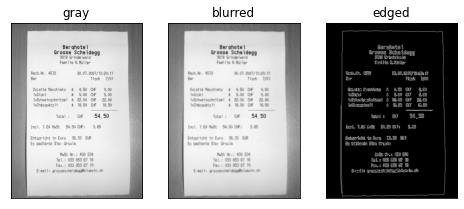

In [5]:
image = org_image.copy()
image = imutils.resize(image, width=500)
ratio = org_image.shape[1] / float(image.shape[1])
 
# 이미지를 grayscale로 변환하고 blur를 적용
# 모서리를 찾기위한 이미지 연산
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)
 
plt_imshow(['gray', 'blurred', 'edged'], [gray, blurred, edged])

**Outline 잡기**

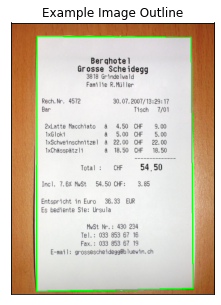

In [6]:
# contours를 찾아 크기순으로 정렬
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
receiptCnt = None
 
# 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
for c in cnts:
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
	# contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영수증 영역으로 판단하고 break
	if len(approx) == 4:
		receiptCnt = approx
		break
 
 
# 만약 추출한 윤곽이 없을 경우 오류
if receiptCnt is None:
	raise Exception(("Could not find receipt outline."))
    
output = image.copy()
cv2.drawContours(output, [receiptCnt], -1, (0, 255, 0), 2)
plt_imshow("Example Image Outline", output)

**Outline 따라 Image Crop**

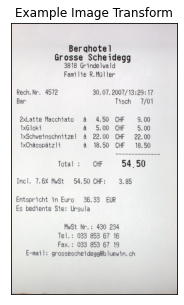

In [7]:
# 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
receipt = four_point_transform(org_image, receiptCnt.reshape(4, 2) * ratio)
plt_imshow("Example Image Transform", receipt)

#2. 이미지 영역 추출

**이미지 내 Grouping**

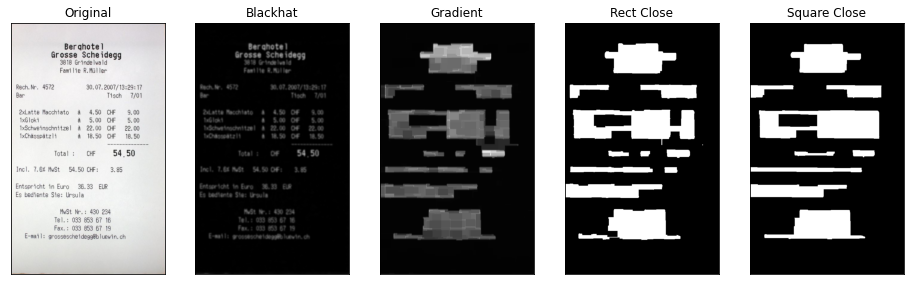

In [8]:
gray = cv2.cvtColor(receipt, cv2.COLOR_BGR2GRAY)
(H, W) = gray.shape
 
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 20))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 21))
 
gray = cv2.GaussianBlur(gray, (11, 11), 0)
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
 
grad = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
grad = np.absolute(grad)
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad = (grad - minVal) / (maxVal - minVal)
grad = (grad * 255).astype("uint8")
 
grad = cv2.morphologyEx(grad, cv2.MORPH_CLOSE, rectKernel)
thresh = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 
close_thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, sqKernel)
close_thresh = cv2.erode(close_thresh, None, iterations=2)
 
plt_imshow(["Original", "Blackhat", "Gradient", "Rect Close", "Square Close"], [receipt, blackhat, grad, thresh, close_thresh], figsize=(16, 10))

**Square Close 확대**

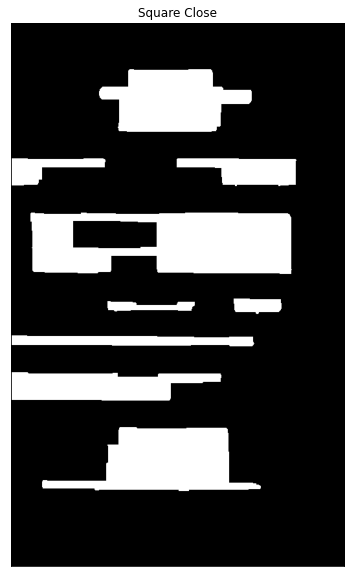

In [9]:
plt_imshow(["Square Close"], [close_thresh], figsize=(16, 10))

**Grouping된 영역 detection**

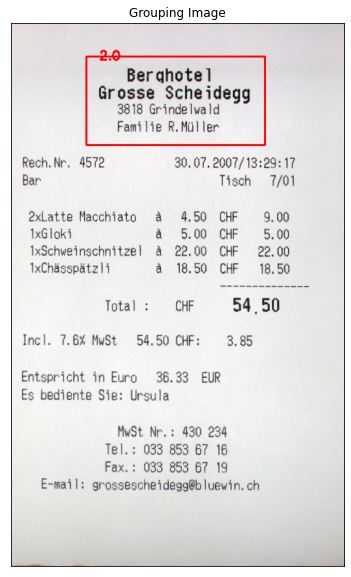

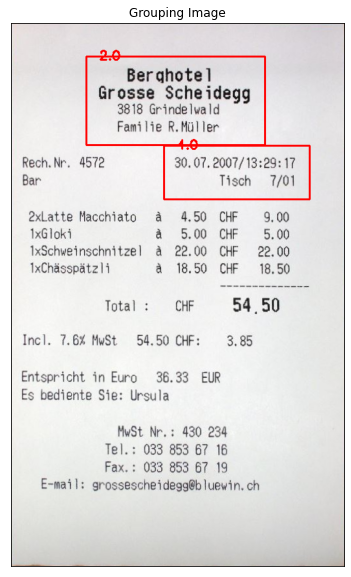

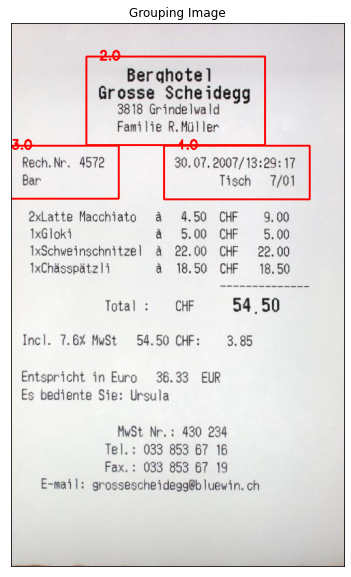

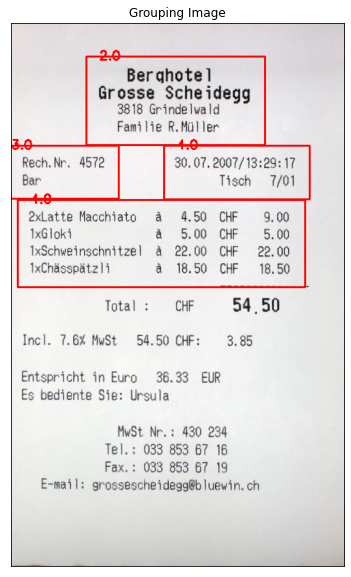

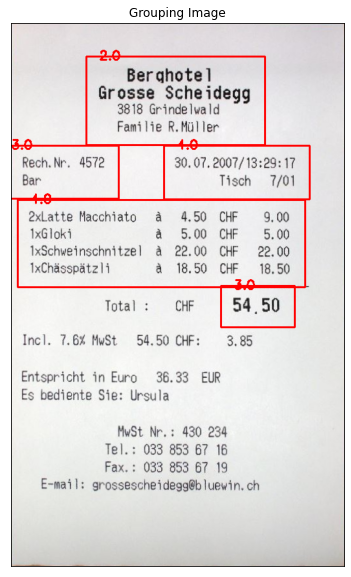

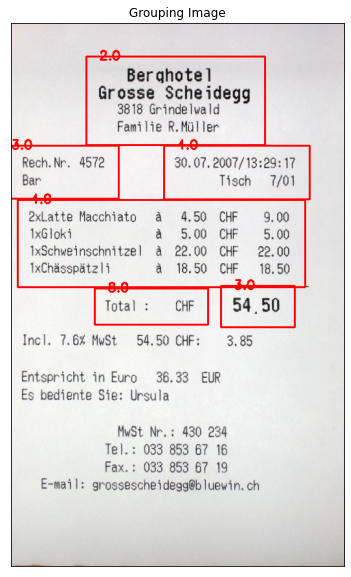

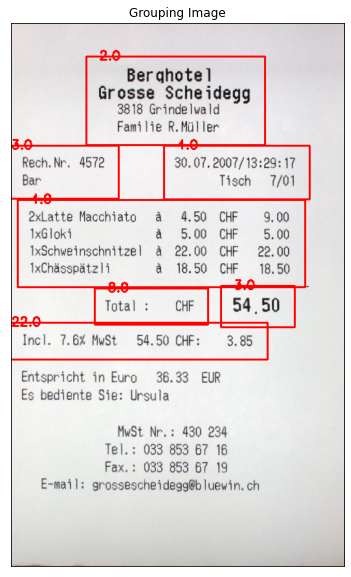

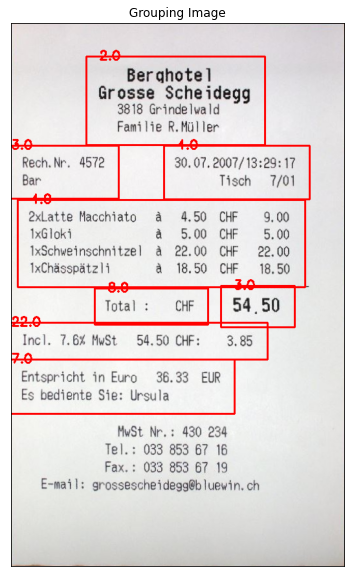

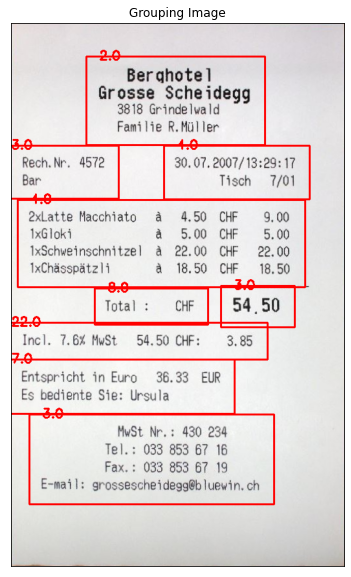

In [10]:
cnts = cv2.findContours(close_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="top-to-bottom")[0]
 
roi_list = []
roi_title_list = []
 
margin = 20
receipt_grouping = receipt.copy()
 
for c in cnts:
  (x, y, w, h) = cv2.boundingRect(c)
  ar = w // float(h)
 
  if ar > 3.0 and ar < 6.5 and (W/2) < x:
    color = (0, 255, 0)
    roi = receipt[y - margin:y + h + margin, x - margin:x + w + margin]
    roi_list.append(roi)
    roi_title_list.append("Roi_{}".format(len(roi_list)))
  else:
    color = (0, 0, 255)
 
  cv2.rectangle(receipt_grouping, (x - margin, y - margin), (x + w + margin, y + h + margin), color, 2)
  cv2.putText(receipt_grouping, "".join(str(ar)), (x, y - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.65, color, 2)
  
  plt_imshow(["Grouping Image"], [receipt_grouping], figsize=(16, 10))